### Visualizing and Predicting Rice Production due to Population Migration and Climate Change

#### Standard Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Cleaned Data

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/global_data/master_df_clean.csv')
df.head()

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.28148,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
1,1961,BLZ,Belize,Central America,Americas,1.0,275.0,25.318518,199.05833,42.0,2297.0,0.018285,Medium,94.703,566.0
2,1961,CAN,Canada,Northern America,Americas,1.0,0.0,-7.946412,34.59439,36695.0,987975.0,0.037142,Medium,18233.964,NaN
3,1961,ETH,Ethiopia,Eastern Africa,Africa,1.0,30.0,22.493770,68.36165,11486.0,122190.0,0.094001,Medium,22671.191,NaN
4,1961,FRA,France,Western Europe,Europe,1.0,21.0,11.384623,65.22725,21405.0,54908.6,0.389830,Medium,46266.981,89171.0


In [ ]:
len(df)

14306

In [ ]:
df.describe()

,year,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,population,rice_production_in_tonnes
count,14306.000000,14306.000000,1.430600e+04,12262.000000,12262.000000,12293.000000,1.229300e+04,12293.000000,1.256700e+04,6.823000e+03
mean,1989.710401,1.013141,5.647585e+05,19.228743,109.547668,7018.669915,6.435461e+04,0.174457,2.462170e+04,2.877301e+06
std,16.940963,2.583381,8.383888e+06,8.705154,85.887674,23638.681648,1.985514e+05,0.152479,1.045635e+05,1.284747e+07
min,1961.000000,0.000000,0.000000e+00,-18.664389,0.000000,0.170000,1.000000e+00,0.000038,1.126000e+00,0.000000e+00
25%,1975.000000,0.000000,0.000000e+00,11.682069,46.713835,36.000000,5.770000e+02,0.046985,3.749510e+02,1.133900e+04
50%,1990.000000,0.000000,0.000000e+00,22.996723,92.542445,970.000000,9.864790e+03,0.132554,4.059684e+03,8.369400e+04
75%,2004.000000,1.000000,9.640000e+02,25.884937,154.885417,4066.000000,4.474201e+04,0.258373,1.274165e+04,6.332040e+05
max,2019.000000,43.000000,3.465615e+08,29.641504,930.095800,240300.000000,2.241237e+06,0.666667,1.433784e+06,1.418548e+08


In [ ]:
print(df.dtypes)

year                           int64
iso                           object
country_or_area               object
region                        object
continent                     object
number_of_disasters          float64
total_human_affected         float64
temperature                  float64
precipitation                float64
cropland                     float64
country_area                 float64
cropland_pct                 float64
variant                       object
population                   float64
rice_production_in_tonnes    float64
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().values.any())

True


In [ ]:
# Note. Many missing values for the later years
df.tail()

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
14301,2017,SCG,Montenegro,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Medium,627.563,NaN
14302,2016,SCG,Montenegro,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Medium,627.264,NaN
14303,2015,SCG,Montenegro,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Medium,626.956,NaN
14304,2014,SCG,Montenegro,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Medium,626.645,NaN
14305,2013,SCG,Montenegro,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Medium,626.345,NaN


#### Top Producers of Rice

In [ ]:
# Extract top producers (with highest production for all years combined in tonnes)
numb_top = 14
top_df = df.groupby(by=["iso"])['rice_production_in_tonnes'].sum().sort_values(ascending=False, inplace=False)
top_df.head(numb_top)

iso
CHN    6.280747e+09
IND    4.142656e+09
IDN    1.558037e+09
BGD    1.165858e+09
VNM    9.181554e+08
THA    8.602123e+08
MMR    6.662066e+08
JPN    5.260793e+08
PHL    4.085145e+08
BRA    3.725743e+08
USA    2.756928e+08
KOR    2.519487e+08
PAK    2.316905e+08
KHM    1.586387e+08
Name: rice_production_in_tonnes, dtype: float64

In [ ]:
# Percentage of production of top producing countries (where "top" is as calculated above)
print(top_df.iloc[:numb_top].sum())
print(top_df.sum())
print(top_df.iloc[:numb_top].sum()/top_df.sum())

17817011211.0
19631825879.0
0.9075575201621316


In [ ]:
top_list = list(top_df.index[:numb_top])
top_list

['CHN',
 'IND',
 'IDN',
 'BGD',
 'VNM',
 'THA',
 'MMR',
 'JPN',
 'PHL',
 'BRA',
 'USA',
 'KOR',
 'PAK',
 'KHM']

In [ ]:
df = df.loc[df['iso'].isin(top_list)]
df.head()

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.281480,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
8,1961,IND,India,Southern Asia,Asia,5.0,5457.0,23.493069,100.191810,160986.0,328726.0,0.489727,Medium,459642.165,35680829.0
10,1961,JPN,Japan,Eastern Asia,Asia,4.0,1302912.0,11.949110,142.934950,6010.0,37780.0,0.159079,Medium,94560.709,10779013.0
11,1961,KOR,Korea (the Republic of),Eastern Asia,Asia,1.0,249.0,12.037022,129.555880,2095.0,9926.0,0.211062,Medium,26084.031,3120893.0
17,1961,USA,United States of America (the),Northern America,Americas,2.0,146.0,6.492202,57.870647,182509.0,962909.0,0.189539,Medium,189569.843,1639486.0


In [ ]:
df[df['year'] == 2012]

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
4169,2012,BGD,Bangladesh,Southern Asia,Asia,5.0,5658498.0,24.966099,200.34877,8520.0,14846.0,0.573892,Medium,151005.739,33681499.0
4175,2012,BRA,Brazil,South America,Americas,3.0,4299003.0,25.582172,139.94810,62189.0,851577.0,0.073028,Medium,199287.299,7703771.0
4180,2012,CHN,China,Eastern Asia,Asia,28.0,44563487.0,6.582550,54.48241,135158.4,956291.1,0.141336,Medium,1384206.401,136225345.0
4209,2012,IDN,Indonesia,South-Eastern Asia,Asia,13.0,52182.0,26.147467,242.11832,45500.0,191093.0,0.238104,Medium,248451.722,39823235.0
4210,2012,IND,India,Southern Asia,Asia,10.0,4281459.0,23.309038,92.32251,169346.0,328726.0,0.515159,Medium,1265780.247,105252600.0
4215,2012,JPN,Japan,Eastern Asia,Asia,7.0,102461.0,11.769478,150.74610,4549.0,37796.0,0.120357,Medium,128423.571,7397697.0
4219,2012,KHM,Cambodia,South-Eastern Asia,Asia,1.0,71514.0,28.031424,164.11841,3955.0,18104.0,0.218460,Medium,14780.454,6197057.0
4220,2012,KOR,Korea (the Republic of),Eastern Asia,Asia,3.0,3142.0,11.606349,143.37580,1730.0,10015.0,0.172741,Medium,50060.639,3605238.0
4229,2012,MMR,Myanmar,South-Eastern Asia,Asia,2.0,86526.0,22.953869,159.06367,12242.0,67659.0,0.180937,Medium,51413.704,17486472.0
4240,2012,PAK,Pakistan,Southern Asia,Asia,5.0,5051235.0,19.374298,24.94371,31063.0,79610.0,0.390190,Medium,187280.129,5538668.0


In [ ]:
len(df)

826

In [ ]:
(2019-1961+1)*15

885

In [ ]:
df.describe()

,year,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,population,rice_production_in_tonnes
count,826.000000,826.000000,8.260000e+02,728.000000,728.000000,826.000000,826.000000,826.000000,8.260000e+02,8.260000e+02
mean,1990.000000,6.374092,8.469699e+06,20.224882,133.702979,46361.295482,259797.252518,0.259411,2.289256e+05,2.157023e+07
std,17.039704,7.373614,3.384082e+07,7.286165,61.125719,60148.349863,358012.633740,0.154590,3.412045e+05,3.105291e+07
min,1961.000000,0.000000,0.000000e+00,5.689573,15.113194,1581.000000,9926.000000,0.036924,5.872966e+03,3.588460e+05
25%,1975.000000,1.000000,2.119000e+03,12.062961,87.746051,6590.000000,30000.000000,0.147733,4.870535e+04,5.029960e+06
50%,1990.000000,4.000000,1.997615e+05,24.117235,143.562915,12450.499950,59485.500000,0.198248,9.603029e+04,8.625644e+06
75%,2005.000000,8.000000,2.502326e+06,25.804664,172.013532,55663.500000,328726.000000,0.371896,1.998593e+05,2.144502e+07
max,2019.000000,43.000000,3.465615e+08,28.031424,288.784850,191014.000000,983151.000000,0.663007,1.433784e+06,1.418548e+08


In [ ]:
df['rice_production_in_tonnes'].sum() == top_df.iloc[:numb_top].sum()

True

#### Pearson Correlations

In [ ]:
# Extract correlations to target
corr_matrix = df.corr()
print(corr_matrix['rice_production_in_tonnes'].sort_values(ascending=False))

rice_production_in_tonnes    1.000000
population                   0.950206
cropland                     0.539486
number_of_disasters          0.530272
total_human_affected         0.513404
country_area                 0.415857
year                         0.223282
cropland_pct                 0.109366
temperature                 -0.275819
precipitation               -0.292386
Name: rice_production_in_tonnes, dtype: float64


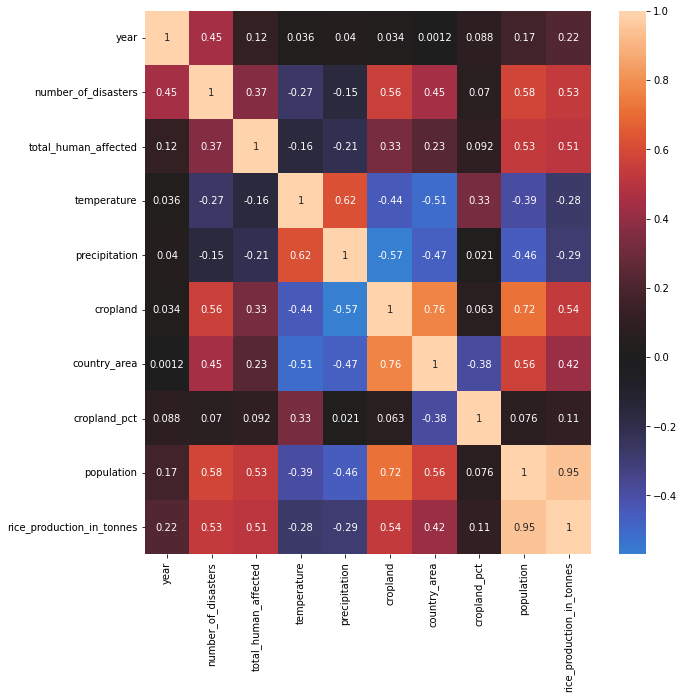

In [ ]:
# Extract correlation between variables
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), center=0,  annot=True, ax=ax)
plt.savefig('correlation_matrix.png', bbox_inches = 'tight')

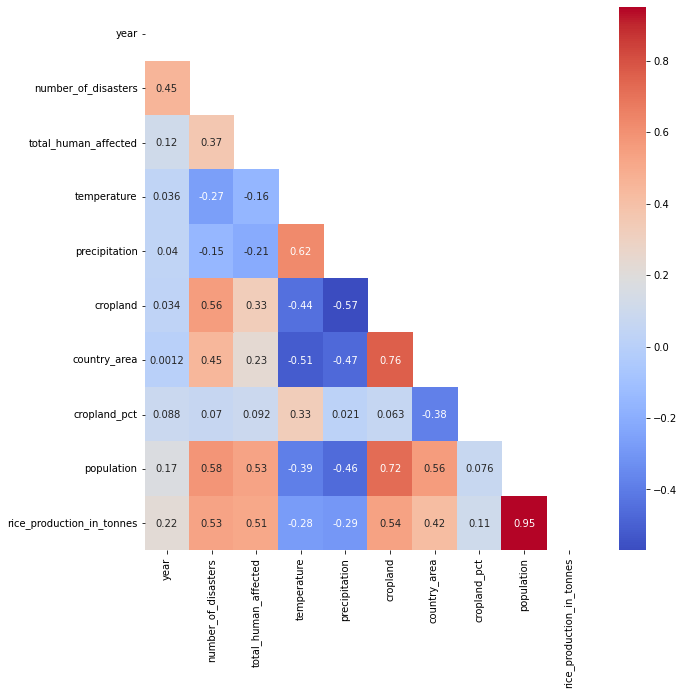

In [ ]:
# Another format for correlation matrix
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);
plt.savefig('correlation_matrix_v2.png', bbox_inches = 'tight')

#### Rice Production over the years

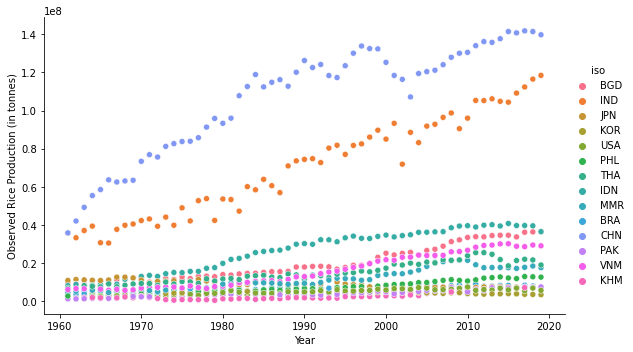

In [ ]:
sns.relplot(data=df, x='year', y='rice_production_in_tonnes', hue='iso',aspect=1.61)
plt.xlabel('Year')
plt.ylabel('Observed Rice Production (in tonnes)')
plt.savefig('rice_production_over_years.png', bbox_inches = 'tight')
plt.show()

#### Linear Regression

In [ ]:
# Drop missing values
df.dropna(axis=0, inplace=True)

In [ ]:
df.describe()

,year,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,population,rice_production_in_tonnes
count,610.000000,610.000000,6.100000e+02,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02,6.100000e+02
mean,1988.777049,6.972131,9.941020e+06,19.722596,132.735128,51564.036473,281047.168426,0.269097,2.424839e+05,2.231875e+07
std,14.541130,6.997598,3.626987e+07,7.451948,63.248888,63589.049773,366719.627291,0.160261,3.383161e+05,3.092914e+07
min,1961.000000,1.000000,0.000000e+00,5.689573,15.113194,1698.000000,9926.000000,0.038781,8.198082e+03,1.210605e+06
25%,1977.000000,2.000000,3.150100e+04,11.791971,82.722958,7637.500000,30000.000000,0.147822,5.662222e+04,5.106596e+06
50%,1990.000000,5.000000,3.538635e+05,24.019324,142.218225,19233.500000,67659.000000,0.208191,1.109007e+05,9.194928e+06
75%,2001.000000,9.000000,3.072565e+06,25.591230,175.077525,61627.750000,328726.000000,0.385338,2.083762e+05,2.297341e+07
max,2012.000000,37.000000,3.420318e+08,28.031424,288.784850,191014.000000,983151.000000,0.663007,1.384206e+06,1.362253e+08


Note. We're left only with years 1961-2012.

In [ ]:
df.columns

Index(['year', 'iso', 'country_or_area', 'region', 'continent',
       'number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland', 'country_area', 'cropland_pct', 'variant',
       'population', 'rice_production_in_tonnes'],
      dtype='object')

In [ ]:
# Extract correlations to target
corr_matrix = df.corr().abs()
print(corr_matrix['rice_production_in_tonnes'].sort_values(ascending=False))

rice_production_in_tonnes    1.000000
population                   0.949599
total_human_affected         0.557934
cropland                     0.499856
number_of_disasters          0.481456
country_area                 0.393968
precipitation                0.283500
temperature                  0.223263
year                         0.187827
cropland_pct                 0.074564
Name: rice_production_in_tonnes, dtype: float64


We can drop cropland_pct from the regression analysis.

(5, 5)
(5,)
coefficient of determination: 1.0
intercept: 27131538.42335158
coefficients: [ 7.30973632e+06 -6.55449583e+00  1.45267382e+06 -3.74236473e+05
 -1.52783223e+02]


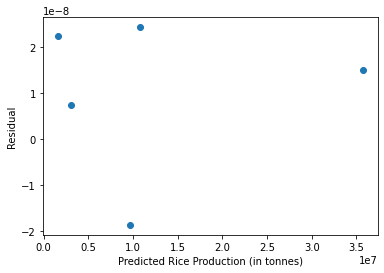

(6, 5)
(6,)
coefficient of determination: 1.0
intercept: 3677010.8137836484
coefficients: [-1.98816279e+07  8.73384157e+02 -4.39229235e+05  2.23993788e+05
  2.74230651e+02]


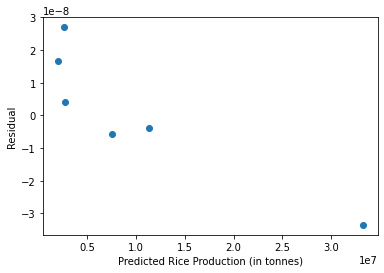

(8, 5)
(8,)
coefficient of determination: 0.971444186816394
intercept: 12231040.075904839
coefficients: [ 3.68189849e+06  6.03416137e+00  3.89859279e+05 -1.20952760e+05
 -9.37832011e+01]


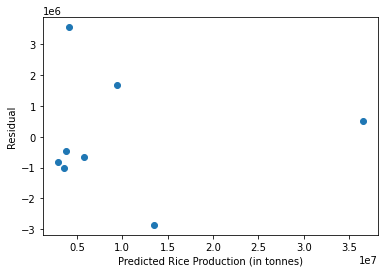

(10, 5)
(10,)
coefficient of determination: 0.4378065016691561
intercept: 23136962.987203762
coefficients: [-4.96887198e+06  1.51496568e+01 -7.42157618e+05  3.82256730e+03
  2.02185116e+02]


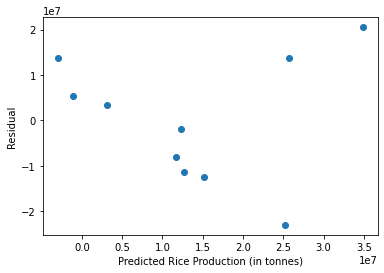

(11, 5)
(11,)
coefficient of determination: 0.43811718594212107
intercept: 39214383.086843744
coefficients: [-6.31072726e+06  3.38736842e-01 -1.71942469e+06  1.06276125e+05
  2.08489311e+01]


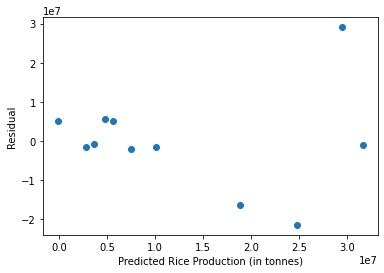

(10, 5)
(10,)
coefficient of determination: 0.601131103318974
intercept: -2048563.109732112
coefficients: [-5.06444400e+06  3.14799955e+00 -1.26796818e+05  9.85711642e+04
  2.06284143e+02]


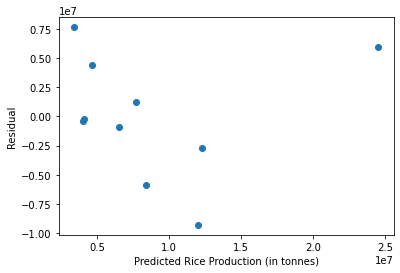

(11, 5)
(11,)
coefficient of determination: 0.34204263722844297
intercept: 16697789.869138742
coefficients: [-3.24005186e+06 -2.11848179e+00 -5.35179773e+05  6.87571248e+04
  1.80031445e+02]


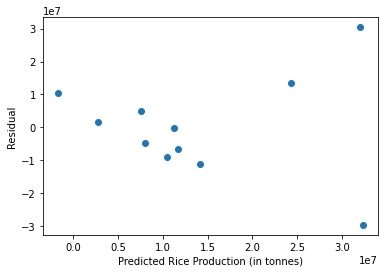

(10, 5)
(10,)
coefficient of determination: 0.6687760182309261
intercept: -6726517.407771304
coefficients: [ 2.92086935e+06  7.23497616e-01  3.25344710e+05 -1.38033682e+04
  4.36506479e+01]


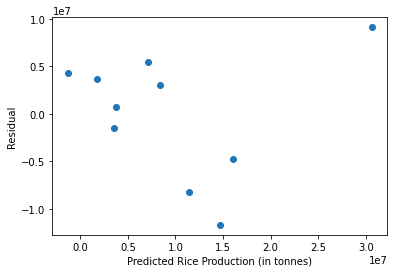

(9, 5)
(9,)
coefficient of determination: 0.8177708024095669
intercept: 48199649.76729858
coefficients: [-1.48994891e+07  5.40892035e+01 -8.46961161e+05 -5.93953515e+04
  3.77245820e+02]


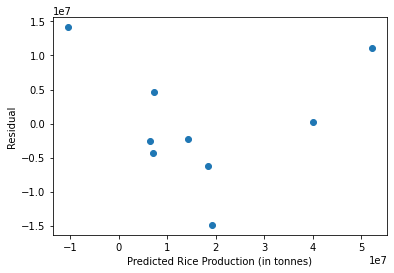

(10, 5)
(10,)
coefficient of determination: 0.2758691115956179
intercept: 36946564.56061206
coefficients: [-3.18720198e+05  5.80732245e-01 -2.07772320e+05 -1.29073778e+05
  3.42612683e+01]


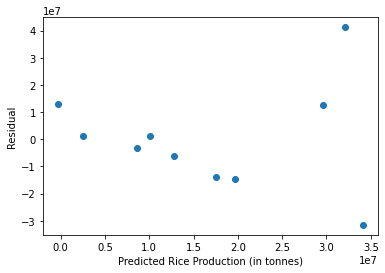

(9, 5)
(9,)
coefficient of determination: 0.9963973419156302
intercept: 6284972.437282219
coefficients: [-3.08895602e+06  6.72880281e+00 -1.40687769e+05  5.44758805e+04
  1.73331870e+01]


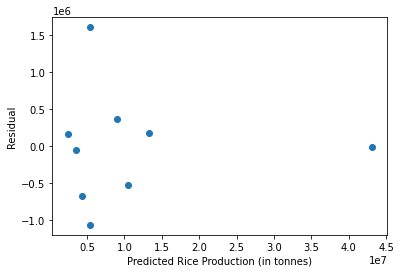

(8, 5)
(8,)
coefficient of determination: 0.9539938163273184
intercept: 4256856.352164795
coefficients: [-2.92449315e+06  1.72137961e-01 -8.28830332e+04  6.88362902e+04
  5.08850663e+01]


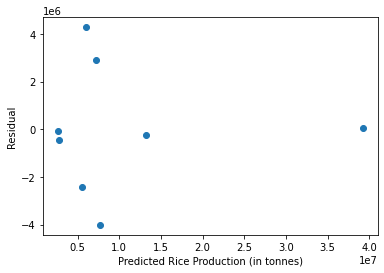

(10, 5)
(10,)
coefficient of determination: 0.4942311692975172
intercept: 38324726.223401636
coefficients: [-7.21226120e+06  7.52842889e-01 -1.65346487e+06  1.32894784e+05
  2.12816583e+02]


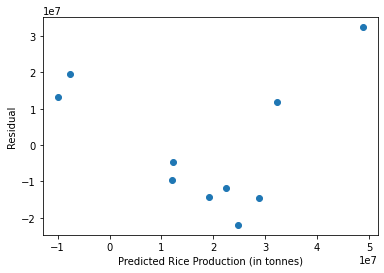

(10, 5)
(10,)
coefficient of determination: 0.23809644739707259
intercept: 33789060.36564995
coefficients: [-1.15459808e+06  1.51585709e-01 -8.97842513e+05 -4.94185663e+03
  8.47180024e+01]


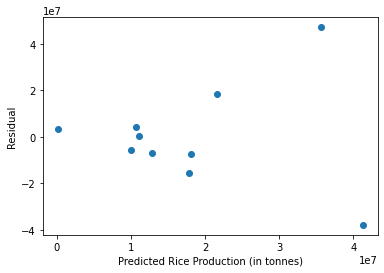

(9, 5)
(9,)
coefficient of determination: 0.7851361686541347
intercept: 54456472.12922473
coefficients: [-7.25196719e+06  2.73203135e+00 -2.10425677e+06  8.10073934e+04
  6.21616031e+00]


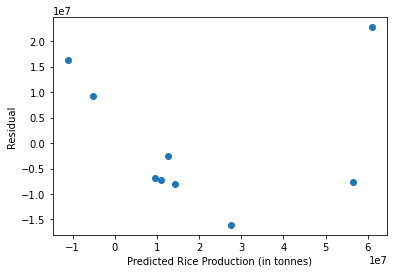

(10, 5)
(10,)
coefficient of determination: 0.32231190977603674
intercept: 37680944.113355964
coefficients: [ 5.48723055e+06 -1.61415790e+00 -1.10475127e+06 -1.16219727e+05
  1.37658819e+01]


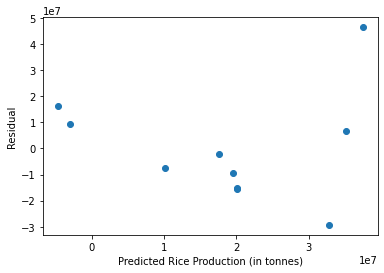

(12, 5)
(12,)
coefficient of determination: 0.9704870678791525
intercept: 3676705.0647675786
coefficients: [-2.80440624e+05  3.24453798e+00 -2.58113783e+05  7.57980544e+04
 -6.50464116e+00]


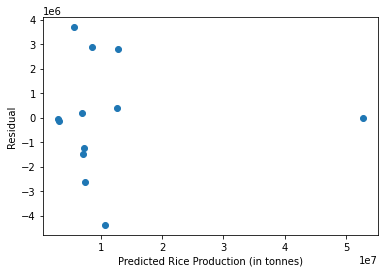

(13, 5)
(13,)
coefficient of determination: 0.5199828793677868
intercept: 37819256.68556474
coefficients: [-1.38471623e+06  2.43883402e+00 -2.04349924e+06  1.33803833e+05
 -5.05695219e+00]


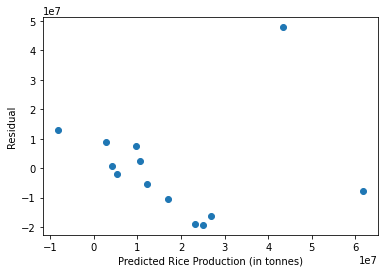

(11, 5)
(11,)
coefficient of determination: 0.39013047700262626
intercept: 59315078.74153347
coefficients: [ 3.96108141e+06  5.82176677e-01 -2.01885391e+06 -1.28109084e+05
 -1.32124551e+02]


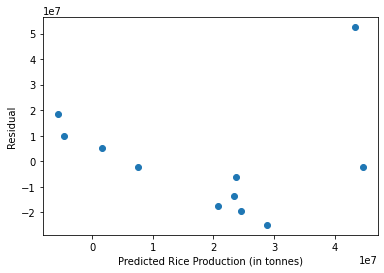

(12, 5)
(12,)
coefficient of determination: 0.29288190938522773
intercept: 37467871.10954203
coefficients: [ 1.46029037e+06  6.64058451e-01 -9.68048658e+05 -7.65889467e+04
 -3.25055979e+00]


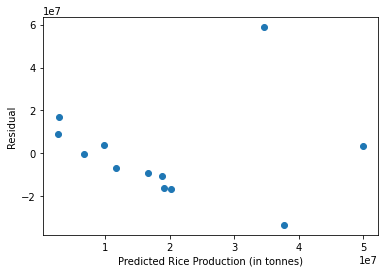

(12, 5)
(12,)
coefficient of determination: 0.48726702462738825
intercept: 32662937.475024395
coefficients: [ 1.94496254e+06  3.30872267e+00 -1.44766417e+06  3.86965654e+03
 -2.07264657e+01]


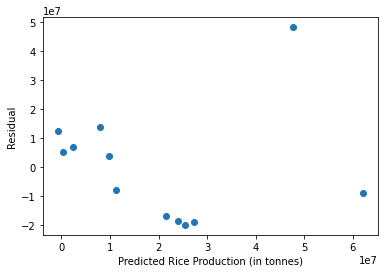

(12, 5)
(12,)
coefficient of determination: 0.2530808660495072
intercept: 43377829.78926679
coefficients: [ 3.84063262e+05  2.44027078e-01 -1.36124086e+06 -3.04960329e+04
  1.92883782e+01]


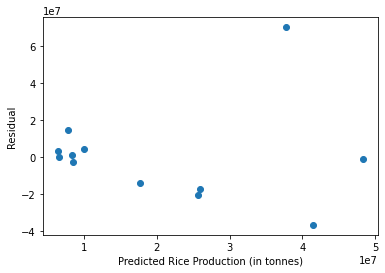

(12, 5)
(12,)
coefficient of determination: 0.24941221068892394
intercept: 26178523.717024136
coefficients: [ 9.66605874e+05 -5.37665525e-01 -6.13839459e+05 -2.22268886e+04
  1.31535359e+02]


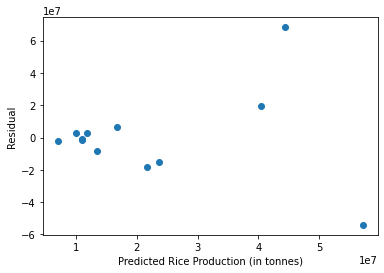

(12, 5)
(12,)
coefficient of determination: 0.31313095013669223
intercept: 13753473.498476308
coefficients: [-5.37981239e+06 -1.37904643e-01 -7.08293363e+05  1.62851685e+05
  6.09346577e+02]


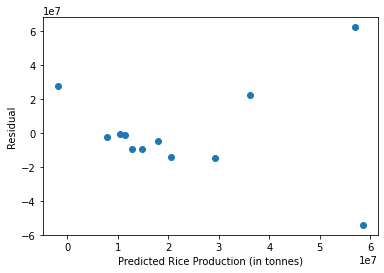

(12, 5)
(12,)
coefficient of determination: 0.47804925186928326
intercept: 33517373.49288391
coefficients: [ 6.31829807e+06  2.77165922e+00 -3.11620236e+05 -2.04553871e+05
 -3.68284600e+02]


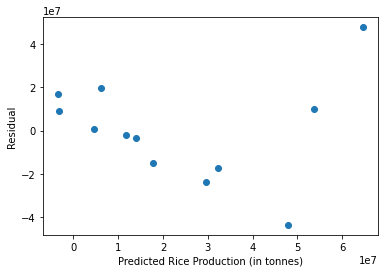

(12, 5)
(12,)
coefficient of determination: 0.9380877233359283
intercept: 2664280.747331444
coefficients: [ 8.11503720e+05  6.82607710e+00  1.10442940e+05 -2.59662846e+04
  1.42762062e+01]


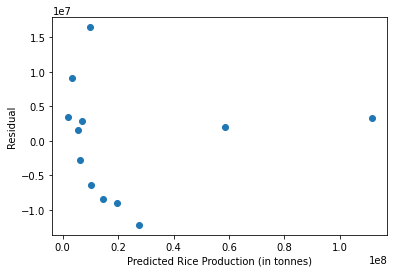

(12, 5)
(12,)
coefficient of determination: 0.781562967052626
intercept: 53221297.68350382
coefficients: [ 8.53130602e+06  9.20899726e-02  5.13344077e+05 -5.02118594e+05
 -5.36991757e+02]


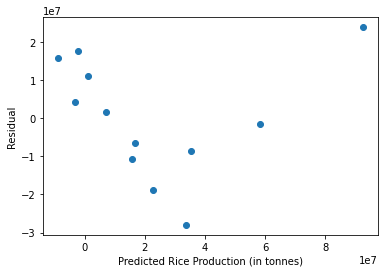

(12, 5)
(12,)
coefficient of determination: 0.7727230031630059
intercept: 18010464.300817084
coefficients: [-2.04443411e+06  9.94203110e-01 -4.46224065e+05 -7.52292697e+03
  2.73596395e+02]


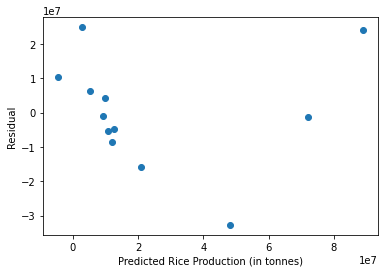

(12, 5)
(12,)
coefficient of determination: 0.9399040478948731
intercept: -29060274.1812778
coefficients: [-3.41560967e+06  8.74085933e-01  6.78365892e+05  2.14528749e+05
  4.78907301e+02]


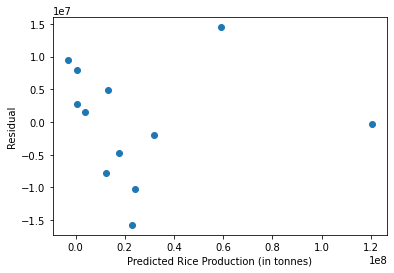

(12, 5)
(12,)
coefficient of determination: 0.901985489242658
intercept: -20278397.032136444
coefficients: [-2.45301829e+06  2.54190469e+00  4.41056745e+05  1.56463298e+05
  4.35199366e+02]


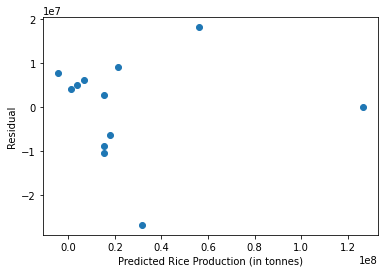

(14, 5)
(14,)
coefficient of determination: 0.9033443582932742
intercept: -16964603.628225513
coefficients: [-1.39999675e+06  4.49164473e-01  4.92289204e+05  1.12760569e+05
  3.85346672e+02]


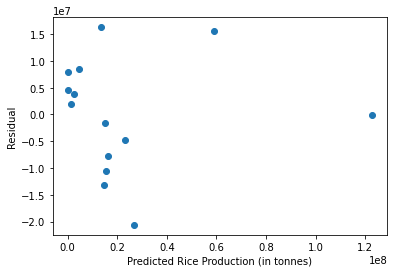

(14, 5)
(14,)
coefficient of determination: 0.8928706246781447
intercept: -25094520.659848046
coefficients: [-2.27697709e+06  3.66294663e+00 -6.63711630e+05  3.53283518e+05
  4.99537315e+02]


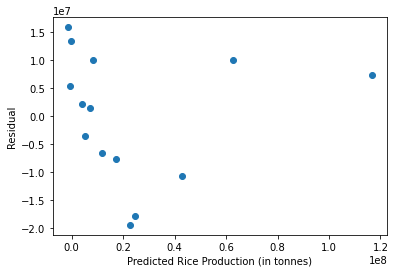

(11, 5)
(11,)
coefficient of determination: 0.468116734091521
intercept: 29441073.10692481
coefficients: [-2.95554532e+06  7.73510093e-02 -1.03718384e+06  1.28445308e+05
  5.65643048e+02]


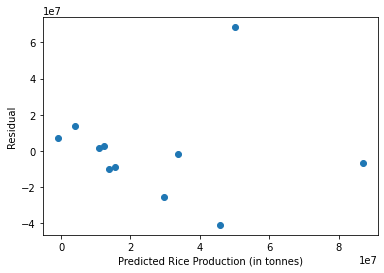

(14, 5)
(14,)
coefficient of determination: 0.8524871830858429
intercept: -25314228.109623495
coefficients: [-8.34948915e+05  4.91632077e-01  1.12901199e+06  8.08262714e+04
  2.72763646e+02]


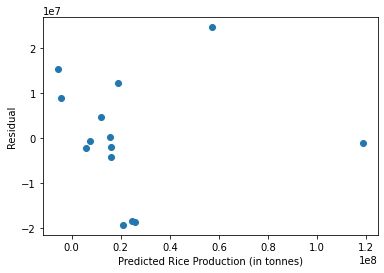

(13, 5)
(13,)
coefficient of determination: 0.9635184889630203
intercept: -14888540.721626606
coefficients: [-2.07617131e+06  8.72031211e-01  3.71323280e+05  1.57115884e+05
  2.80620078e+02]


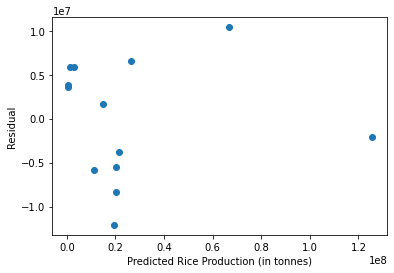

(13, 5)
(13,)
coefficient of determination: 0.8796422826985869
intercept: -26084253.15013881
coefficients: [4.30941327e+05 6.60232839e-01 1.22129299e+06 3.41616979e+04
 1.88819700e+02]


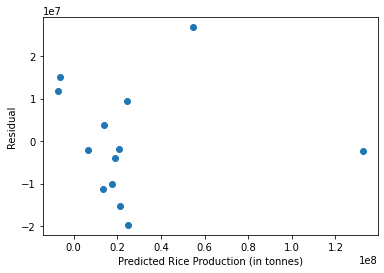

(14, 5)
(14,)
coefficient of determination: 0.7248805161184442
intercept: 29849755.7690783
coefficients: [ 1.61719282e+06  4.20286748e+00 -1.10753773e+06  6.31001298e+03
 -2.84332915e+02]


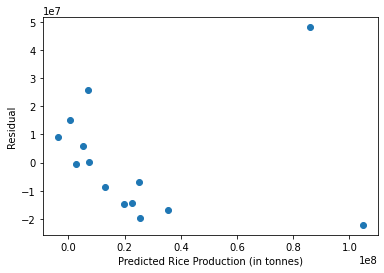

(12, 5)
(12,)
coefficient of determination: 0.9592854220395515
intercept: 4176305.969214622
coefficients: [-4.11141823e+06  4.08496582e-01 -3.26666776e+05  1.75009080e+05
  7.07247591e+02]


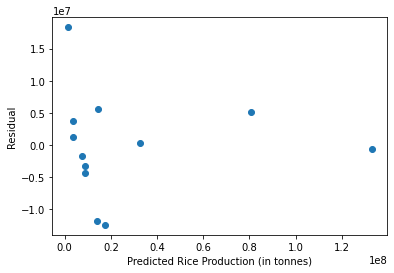

(14, 5)
(14,)
coefficient of determination: 0.9523906372780678
intercept: -24430822.434845645
coefficients: [-1.09987321e+06  1.05118827e+00  8.05629373e+05  1.18591485e+05
  2.55513026e+02]


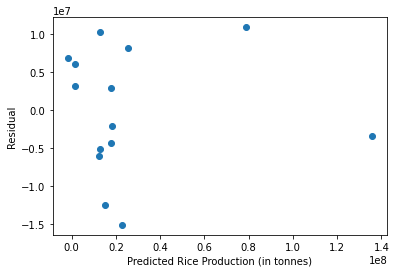

(13, 5)
(13,)
coefficient of determination: 0.6674336803487928
intercept: 7790665.822514817
coefficients: [ 3.34253924e+06  9.08238312e-01 -1.99156783e+04 -1.05669035e+05
 -3.71812904e+02]


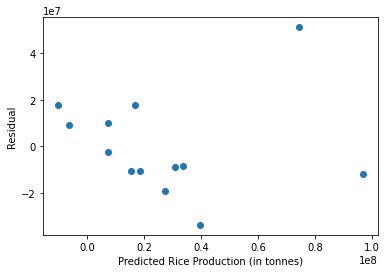

(14, 5)
(14,)
coefficient of determination: 0.9411956599108414
intercept: -7854482.049534682
coefficients: [-6.28827117e+04  2.81141007e+00  1.06112920e+05  9.64567228e+04
  7.46123258e+01]


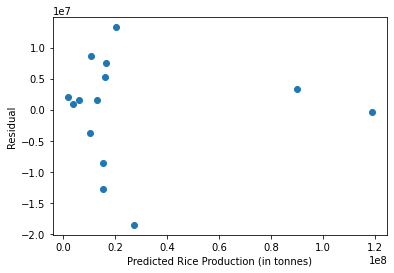

(14, 5)
(14,)
coefficient of determination: 0.9052219706698931
intercept: -3430708.8353135996
coefficients: [ 1.94110320e+06  2.96862529e-01 -3.18859765e+05  9.71850432e+04
 -2.93512106e+02]


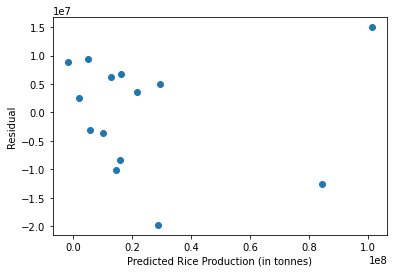

(12, 5)
(12,)
coefficient of determination: 0.8233921048547568
intercept: -39500736.255916014
coefficients: [-1.10735577e+06  4.95442132e-01  1.69331687e+06  1.11686058e+05
  3.89756104e+02]


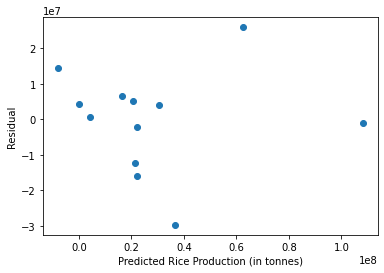

(14, 5)
(14,)
coefficient of determination: 0.7933537599964315
intercept: -9843599.922210578
coefficients: [ 1.20491839e+06  1.34924496e+00  1.14258386e+06 -1.10965361e+05
  5.25787274e+01]


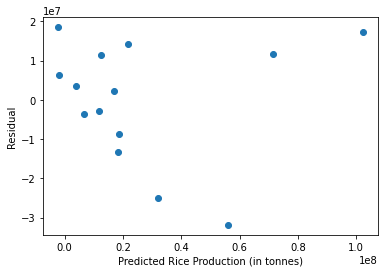

(14, 5)
(14,)
coefficient of determination: 0.9607543285817631
intercept: -33928332.99355607
coefficients: [1.88130888e+06 1.00287304e+00 4.48634753e+05 1.61479799e+05
 2.13363453e+01]


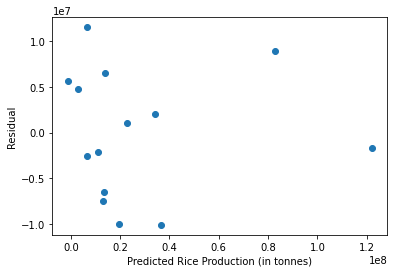

(14, 5)
(14,)
coefficient of determination: 0.8342460211535108
intercept: -28960497.944826975
coefficients: [-6.47381398e+05  1.31486232e+00  1.39224540e+06  5.88881747e+04
  3.44864717e+02]


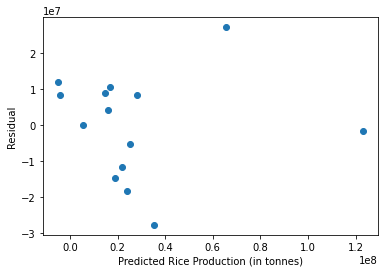

(14, 5)
(14,)
coefficient of determination: 0.9055405159301916
intercept: -24877011.354128506
coefficients: [2.68017879e+05 9.64561732e-01 1.30208685e+06 2.16698123e+04
 1.53748937e+02]


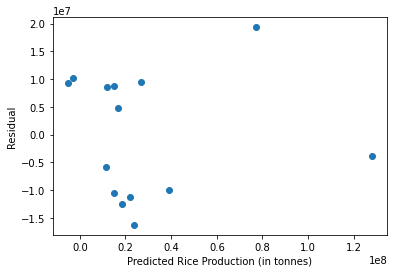

(13, 5)
(13,)
coefficient of determination: 0.8510136300522574
intercept: -32806665.349456586
coefficients: [-1.91648254e+06  1.07263842e+00  1.46821951e+06  1.36760442e+05
  3.92592848e+02]


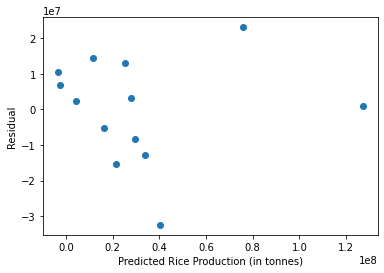

(13, 5)
(13,)
coefficient of determination: 0.8702948839634119
intercept: -39911380.326199636
coefficients: [-1.06645194e+06  1.01795129e+00  1.83571358e+06  7.29776329e+04
  3.82031316e+02]


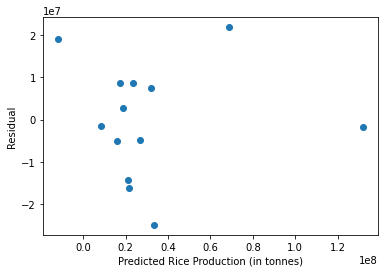

(14, 5)
(14,)
coefficient of determination: 0.8364788227356528
intercept: -45276761.49497582
coefficients: [-8.44514279e+05  6.73451205e-01  1.25791963e+06  1.72165369e+05
  4.26500111e+02]


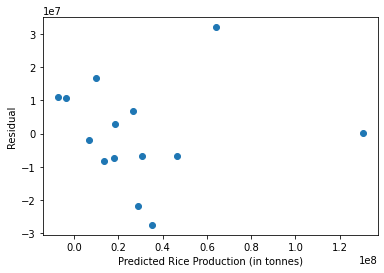

(14, 5)
(14,)
coefficient of determination: 0.8613413996401886
intercept: -37366734.26089519
coefficients: [-1.43054668e+06  9.92031079e-01  9.28309646e+05  1.99261841e+05
  4.70691847e+02]


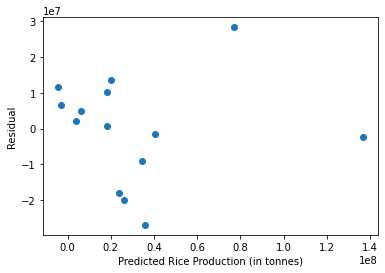

(14, 5)
(14,)
coefficient of determination: 0.8306723668725111
intercept: -19032518.31480248
coefficients: [-2.81240813e+06  2.85727096e+00 -9.45515266e+05  3.16893147e+05
  6.58370692e+02]


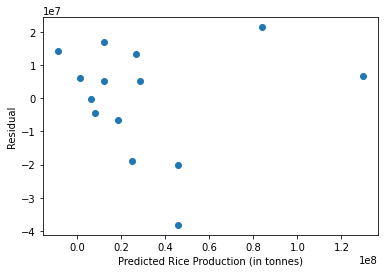

In [ ]:
# Years range
int_years = range(1961,2013)
int_list = []
coeff_list = []

for yr in int_years:
    # Fix a year to study
    yr_df = df[df['year'] == yr ]
    
    # Predictors
    X = yr_df[['number_of_disasters', 'total_human_affected', 'temperature',
           'precipitation', 'cropland']].to_numpy() 
    print(X.shape)

    # Response
    Y = yr_df['rice_production_in_tonnes'].to_numpy()
    print(Y.shape)
    
    # Regression Model
    reg_model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
    reg_model.fit(X, Y)

    # R-squared Value
    r_sq = reg_model.score(X, Y)
    print('coefficient of determination:', r_sq)

    # Print intercept
    int_list.append(reg_model.intercept_)
    print('intercept:', reg_model.intercept_)

    # Print coefficients
    coeff_list.append(reg_model.coef_)
    print('coefficients:', reg_model.coef_) 
    
    #Residual Plot
    Y_pred = reg_model.predict(X)
    plt.figure()
    plt.scatter(Y_pred, Y-Y_pred);
    plt.xlabel('Predicted Rice Production (in tonnes)')
    plt.ylabel('Residual')
    plt.show()

#### Average Linear Regression Model

(610, 5)
(610,)
(5,)


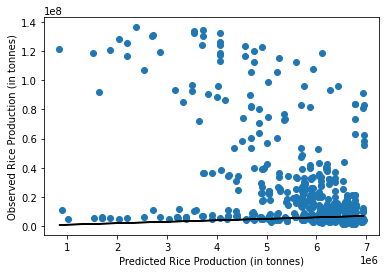

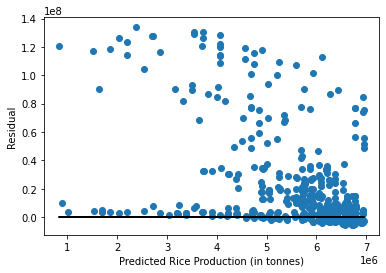

In [ ]:
# Predictors (all years combined)
X = df[['number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland']].to_numpy()

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

# Response (all years combined)
Y = df['rice_production_in_tonnes'].to_numpy()
print(Y.shape)

# Average coefficients
coeff_mean = np.mean(coeff_list, axis=0)
print(coeff_mean.shape)

# Average intercept
int_mean = np.mean(int_list)

# Average regression model
Y_pred = X@coeff_mean + int_mean

# Predicted vs Observed Plot
plt.figure()
plt.plot(Y_pred, Y_pred, 'k');
plt.scatter(Y_pred, Y);
plt.xlabel('Predicted Rice Production (in tonnes)')
plt.ylabel('Observed Rice Production (in tonnes)')
plt.savefig('average_lr_model.png', bbox_inches = 'tight')
plt.show()

# Residual Plot
plt.figure()
plt.plot(Y_pred, np.zeros(Y_pred.shape), 'k');
plt.scatter(Y_pred, Y-Y_pred);
plt.xlabel('Predicted Rice Production (in tonnes)')
plt.ylabel('Residual')
plt.savefig('average_lr_model_residual.png', bbox_inches = 'tight')
plt.show()

#### Linear Regression Model with Population only

In [ ]:
global_df = df.groupby(['year']).sum()
global_df.tail()

,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,population,rice_production_in_tonnes
year,,,,,,,,,
2008,137.0,191219127.0,259.043297,1830.217807,668120.0556,3635147.18,3.573637,4072505.644,408997201.0
2009,133.0,166808882.0,278.245763,1770.384687,672721.6000,3643268.90,3.640986,4078433.087,406095990.0
2010,121.0,230744607.0,290.267669,2011.978441,673516.9000,3653262.50,3.833049,4168781.659,418115786.0
2011,143.0,172348026.0,283.377625,2056.149765,674167.2000,3653263.30,3.841706,4209390.447,433371518.0
2012,130.0,89388966.0,286.357048,2017.022030,674101.2000,3653275.20,3.866108,4249584.321,435574156.0


(52, 1)
(52, 1)
coefficient of determination: 0.9869900853390448
intercept: [-49073436.72684014]
coefficients: [[0.10929408]]


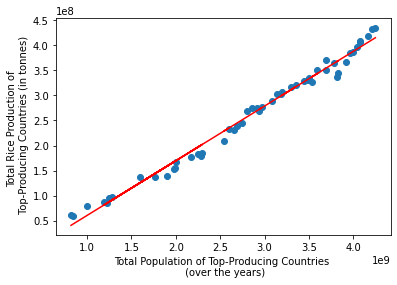

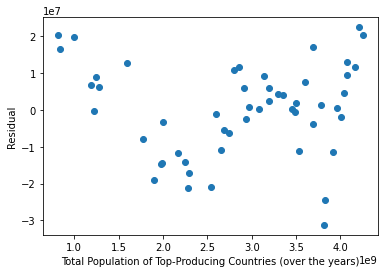

In [ ]:
# Predictor
X = global_df['population'].to_numpy().reshape(-1,1)*1000
print(X.shape)

# Response
Y = global_df['rice_production_in_tonnes'].to_numpy().reshape(-1,1)
print(Y.shape)

# Regression Model
reg_model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
reg_model.fit(X, Y)

# R-squared Value
r_sq = reg_model.score(X, Y)
print('coefficient of determination:', r_sq)

# Print intercept
print('intercept:', reg_model.intercept_)

# Print coefficients
print('coefficients:', reg_model.coef_) 

# Regression Plot
Y_pred = reg_model.predict(X)
plt.scatter(X, Y);
plt.plot(X, Y_pred, 'r');
plt.xlabel('Total Population of Top-Producing Countries \n (over the years)')
plt.ylabel('Total Rice Production of \n Top-Producing Countries (in tonnes)')
plt.savefig('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/figures/population_lr_model.png', bbox_inches='tight')
plt.show()

# Residual Plot
plt.figure()
plt.scatter(X, Y-Y_pred);
plt.xlabel('Total Population of Top-Producing Countries (over the years)')
plt.ylabel('Residual')
plt.savefig('population_lr_residual.png')
plt.show()